# 1.3 Steady-state 1D adiabatic fixed bed reactor model with irreversible first order exothermic reaction: A -> B + C
## Using scipy.integrate solve_ivp 

Final concentration: t = 0.5, c = [-5.15677479e-14  2.00000000e+00  2.00000000e+00  1.50000000e+03]


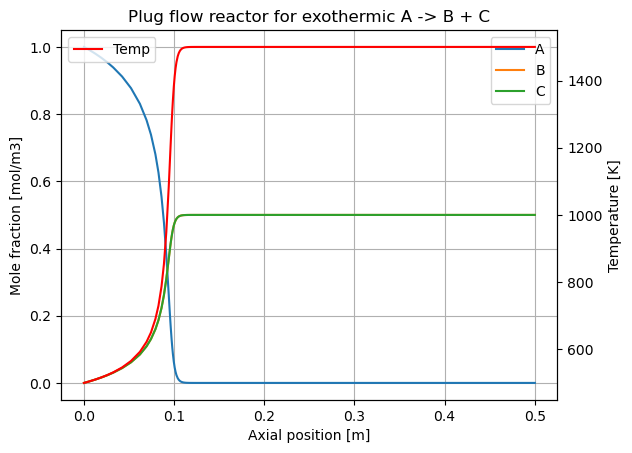

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def source(z, u, **param):
    Ftot = u[0] + u[1] + u[2]
    FtotCp = u[0]*param["CpA"] + u[1]*param["CpB"] + u[2]*param["CpC"]
    xA = u[0]/Ftot
    xB = u[1]/Ftot
    xC = u[2]/Ftot
    Temp = u[3]
    ctot = param["pres"]/(param["Rgas"]*Temp)
    
    k = param["k10"]*np.exp(-param["Eact"]/(param["Rgas"]*Temp))
    r = k*xA*ctot
    
    s = np.zeros_like(u)
    s[0] = -r
    s[1] = r
    s[2] = r
    s[3] = r*-param["DHr"]/FtotCp
    return s

param = {"vel": 2.0, "length": 0.5, "T_in": 500, "pres": 101325, "xA_in":1.0, "xB_in": 0.0, "xC_in": 0.0,
         "k10": 1.0e4, "Eact": 50e3, "Rgas": 8.314, "DHr": -100e3, "CpA": 100, "CpB": 60, "CpC": 40}

t_span = [0, param["length"]]
u0 = [param["xA_in"]*param["vel"], param["xB_in"]*param["vel"], param["xC_in"]*param["vel"], param["T_in"]]
sol = solve_ivp(lambda z, u: source(z, u, **param), t_span, u0, method='LSODA')
print(f"Final concentration: t = {sol.t[-1]}, c = {sol.y[:,-1]}")

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for i in range(3):
    ax1.plot(sol.t, sol.y[i]/(sol.y[0]+sol.y[1]+sol.y[2]), label=chr(ord('A') + i))
ax2.plot(sol.t, sol.y[3], label='Temp', color='r')
plt.title('Plug flow reactor for exothermic A -> B + C')
ax1.set_xlabel('Axial position [m]')
ax1.set_ylabel('Mole fraction [mol/m3]')
ax2.set_ylabel('Temperature [K]')
ax1.legend()
ax2.legend()
ax1.grid()
plt.show()